In [9]:
import pandas as pd
import numpy as np

In [3]:
#the dataset is so large that's why i am using api from kaggle

upload your kaggle.json on the same directory

In [4]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


Importing the dataset

In [5]:
#API to fetch the dataset
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other




  0%|          | 0.00/80.9M [00:00<?, ?B/s]
  1%|1         | 1.00M/80.9M [00:01<01:55, 728kB/s]
  2%|2         | 2.00M/80.9M [00:01<00:55, 1.48MB/s]
  4%|3         | 3.00M/80.9M [00:01<00:34, 2.37MB/s]
  6%|6         | 5.00M/80.9M [00:01<00:17, 4.50MB/s]
 10%|9         | 8.00M/80.9M [00:02<00:09, 7.97MB/s]
 12%|#2        | 10.0M/80.9M [00:02<00:07, 9.91MB/s]
 15%|#4        | 12.0M/80.9M [00:02<00:06, 11.9MB/s]
 17%|#7        | 14.0M/80.9M [00:02<00:05, 13.7MB/s]
 20%|#9        | 16.0M/80.9M [00:02<00:04, 15.0MB/s]
 22%|##2       | 18.0M/80.9M [00:02<00:04, 16.2MB/s]
 25%|##4       | 20.0M/80.9M [00:02<00:03, 17.0MB/s]
 28%|##8       | 23.0M/80.9M [00:02<00:04, 15.1MB/s]
 31%|###       | 25.0M/80.9M [00:03<00:04, 13.8MB/s]
 33%|###3      | 27.0M/80.9M [00:03<00:04, 12.7MB/s]
 36%|###5      | 29.0M/80.9M [00:03<00:04, 11.7MB/s]
 38%|###8      | 31.0M/80.9M [00:03<00:04, 11.2MB/s]
 41%|####      | 33.0M/80.9M [00:03<00:04, 10.8MB/s]
 43%|####3     | 35.0M/80.9M [00:04<00:04, 10.6MB/s]
 4

In [8]:
#extracting the compressed dataset
import zipfile

# Unzipping the dataset
with zipfile.ZipFile("sentiment140.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")  # Extract to a folder named 'dataset'

print("Dataset extracted!")

Dataset extracted!


In [10]:
df = pd.read_csv("dataset/training.1600000.processed.noemoticon.csv", encoding='latin-1')

In [11]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [12]:
df.shape

(1599999, 6)

The first row is treated as column headers, can be easily fixed when loading the dataset into pandas. By default, pandas considers the first row as column headers, but in your case, the dataset contains the actual data in the first row.

To handle this, you can explicitly tell pandas not to treat the first row as the header by specifying the header argument when reading the CSV.

In [15]:
df = pd.read_csv("dataset/training.1600000.processed.noemoticon.csv", header=None, encoding='latin-1')
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [17]:
# Define the column names manually since the first row is treated as data
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [18]:
df.shape

(1600000, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [20]:
#check for null values
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [23]:
df['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

<BarContainer object of 2 artists>

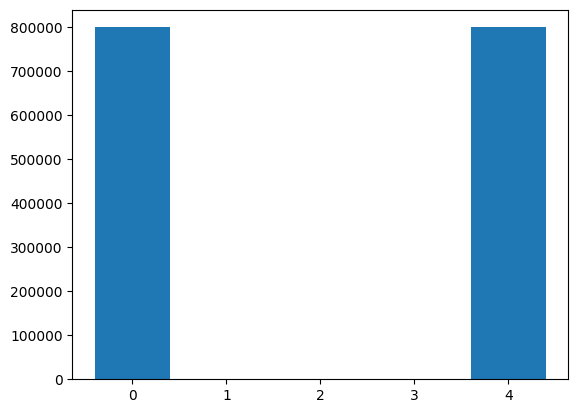

In [30]:
import matplotlib.pyplot as plt

sentiment_counts = df['target'].value_counts()

# Simple bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values)

In [31]:
df['tweet_length'] = df['text'].apply(len)

In [34]:
# Add a new column for the length of each tweet
df['tweet_length'] = df['text'].apply(len)
df.head()

,target,ids,date,flag,user,text,tweet_length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111


Text(0, 0.5, 'Frequency')

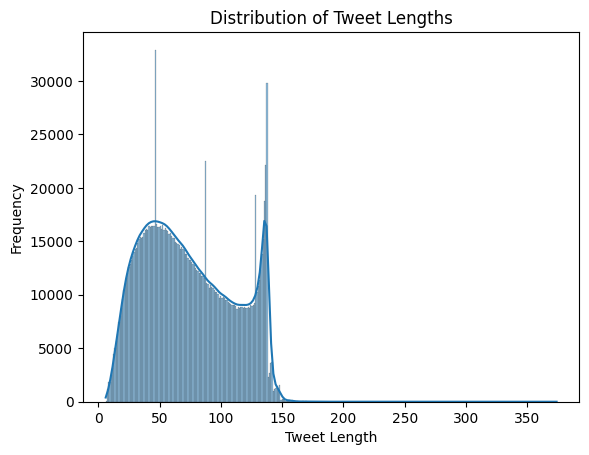

In [39]:
sns.histplot(data= df, x=df['tweet_length'], kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')

In [43]:
#Replace the values 0 and 4 in the target column with 0 (negative) and 1 (positive), using replace()
df['target'] = df['target'].replace({4: 1})
df.head()

,target,ids,date,flag,user,text,tweet_length
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111


In [44]:
df['target'].value_counts()

0    800000
1    800000
Name: target, dtype: int64

In [46]:
#0------->negative
#1------->positive

<b><h4>Text Preprocessing<h4></b>

In [50]:
#Prepare the tweets in the text column for machine learning. This step includes:
#Text Cleaning (Removing URLs, mentions, and non-alphabetic characters).
#Tokenization (Splitting the text into words).
#Stopword Removal (Removing common words like "and", "the", etc.).
#Stemming (Reducing words to their root form).

import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sahaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [51]:
# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 1. Remove URLs
    text = re.sub(r'http\S+', '', text)

    # 2. Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # 3. Remove non-alphabetic characters (keeping spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 4. Tokenize the text into words
    tokens = word_tokenize(text)

    # 5. Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # 6. Perform stemming
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    # Return the cleaned, tokenized, and stemmed text
    return " ".join(stemmed_tokens)

# Apply preprocessing to your dataframe
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [52]:
df.head()

,target,ids,date,flag,user,text,tweet_length,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115,awww that bummer shoulda got david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,111,upset cant updat facebook text might cri resul...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,89,dive mani time ball manag save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,47,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",111,behav im mad cant see


<b><h5>Split the Data into Train and Test</h5></b>

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df['cleaned_text']  # Features (processed text)
Y = df['target']          # Target variable (sentiment labels)

In [59]:
# Split the data into train and test sets (80% train, 20% test)
#To ensure that the distribution of the target labels (sentiment labels in your case, 0 for negative and 1 for positive) is similar in both the training and testing sets, 
#you can use the stratify parameter in the train_test_split function.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

<b><h5>Converting text data to numerical format using tfidf<h5></b>

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

In [70]:
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

AttributeError: 'csr_matrix' object has no attribute 'lower'

In [72]:
print(X_train)

  (0, 1854)	0.34814138546044404
  (0, 4187)	0.2652861788880653
  (0, 4361)	0.38348410265966754
  (0, 2905)	0.20740122915457276
  (0, 4960)	0.26042365324018285
  (0, 2330)	0.31167862806587043
  (0, 1432)	0.2361283315914862
  (0, 52)	0.4084849430619672
  (0, 1511)	0.2846645747516124
  (0, 2128)	0.28850675080199756
  (0, 1748)	0.16618666368887552
  (0, 2545)	0.19717209630104524
  (1, 1435)	0.5132226288206562
  (1, 1954)	0.5777824089168985
  (1, 4883)	0.6346416478711436
  (2, 4328)	0.350095532401876
  (2, 310)	0.24709795501818949
  (2, 870)	0.2681674710722341
  (2, 3203)	0.4031655378330274
  (2, 4336)	0.2804234218406525
  (2, 4946)	0.30125195509757907
  (2, 128)	0.32257538950418935
  (2, 2773)	0.24678530430314197
  (2, 3772)	0.2528361035733952
  (2, 4859)	0.3206350918050151
  :	:
  (1279997, 943)	0.45420875597234434
  (1279997, 2727)	0.36184396091596305
  (1279997, 1881)	0.26273137834711074
  (1279997, 3948)	0.3371056391635694
  (1279997, 4266)	0.2763555117444241
  (1279997, 2699)	0.298265

In [74]:
print(X_test)

  (0, 4944)	0.20814933437372216
  (0, 4729)	0.1645754446018266
  (0, 3535)	0.26440791112460366
  (0, 3515)	0.17096182800642296
  (0, 2556)	0.17845622003355485
  (0, 2267)	0.37298618920957666
  (0, 1525)	0.298319572653293
  (0, 1114)	0.2978493402626631
  (0, 861)	0.6021596001073143
  (0, 454)	0.27609066750879574
  (0, 292)	0.2072508868829438
  (1, 4763)	0.23947802973599447
  (1, 4659)	0.41580010574955434
  (1, 3068)	0.29161197037232856
  (1, 3055)	0.19338394109055973
  (1, 2553)	0.2446037018473392
  (1, 2227)	0.35978971355642186
  (1, 2075)	0.25650262019655
  (1, 804)	0.3096078691624762
  (1, 633)	0.277524424467372
  (1, 412)	0.24614011041713013
  (1, 385)	0.39848545708810357
  (2, 4336)	0.2566358909129536
  (2, 4333)	0.22427044650294345
  (2, 3043)	0.32889516581429146
  :	:
  (319997, 4836)	0.24331861909391028
  (319997, 4769)	0.2292045709243634
  (319997, 4000)	0.2756279775712609
  (319997, 2060)	0.2296544911714015
  (319997, 1748)	0.3702504861094481
  (319997, 1617)	0.257656991051881

<b><h5>Training the model</h5></b>

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
model = LogisticRegression(max_iter=1000)

In [77]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

<b><h5>Model Evaluation</h5></b>

In [78]:
from sklearn.metrics import accuracy_score

In [81]:
Y_pred = model.predict(X_test)

In [82]:
accuracy = accuracy_score(Y_test, Y_pred)

In [83]:
print("accuracy = ", accuracy)

accuracy =  0.77285625


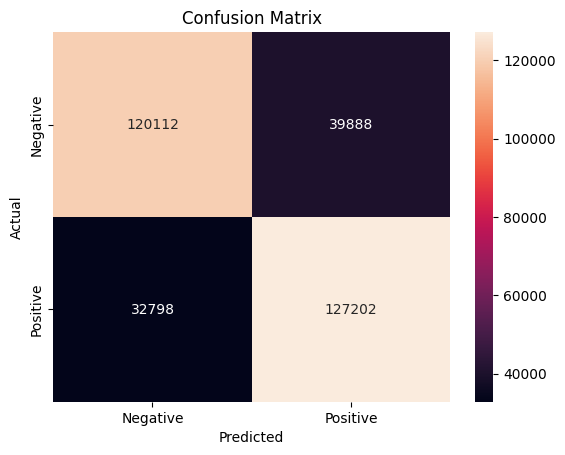

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


<h5><b>Save the Model</b></h5>

In [97]:
import pickle

filename = "sentiment_analysis_model.pkl"
pickle.dump(model, open(filename, 'wb'))

print("Model saved as sentiment_analysis_model.pkl")

Model saved as sentiment_analysis_model.pkl


In [99]:
# Save the vectorizer as vectorizer.pkl
filename_vectorizer = "vectorizer.pkl"
pickle.dump(tfidf_vectorizer, open(filename_vectorizer, 'wb'))

print("Vectorizer saved as vectorizer.pkl")

Vectorizer saved as vectorizer.pkl
